# opencvを用いた色検知
動画ファイルでの各選手の位置情報を得るために、色検知アルゴリズムを用いて解析を行う。

#### 必要なライブラリのインポート

In [1]:
import os, time, cv2

import numpy as np
import matplotlib.pyplot as plt

#### 各種パラメータの定義

In [28]:
indir = os.path.join('_fig')
infile_list = [infile for infile in os.listdir(indir) if infile.startswith('frame_')]

# boundary_list = [([17, 15, 100], [50, 56, 200]),([25, 1, 190], [62, 174, 250])]
# boundary_list = [([0, 50, 50], [10, 155, 255]),([20, 50, 50], [100, 255, 255])]

### 画像データの理解

#### エッジ検出

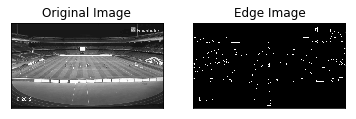

In [4]:
for infile in infile_list[:1]:
    img = cv2.imread(os.path.join(indir,infile),0)
    edges = cv2.Canny(img,100,200)

    plt.subplot(121),plt.imshow(img,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

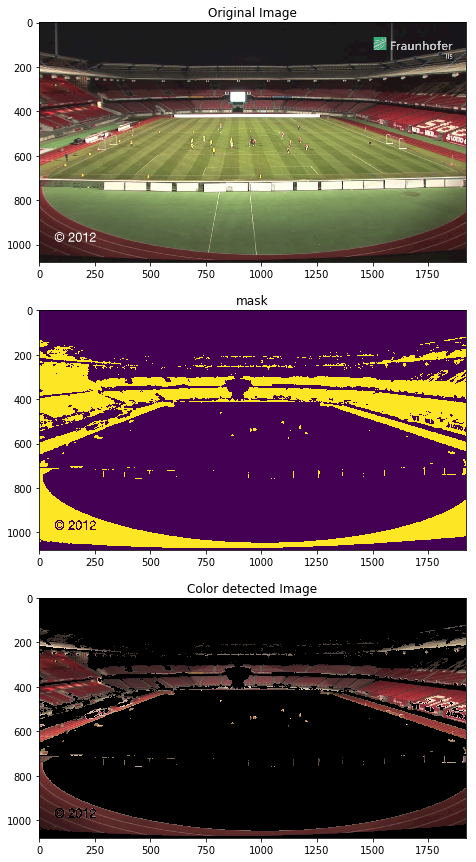

In [41]:
for infile in infile_list[:1]:
    image = cv2.imread(os.path.join(indir, infile))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

   # lower mask (0-10)
    lower_red = np.array([0,50,50])
    upper_red = np.array([20,255,255])
    mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

    # upper mask (170-180)
    lower_red = np.array([170,50,50])
    upper_red = np.array([180,255,255])
    mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

    # join my masks
    mask = mask0+mask1

    # set my output img to zero everywhere except my mask
    output_img = image.copy()
    output_img[np.where(mask==0)] = 0

    # or your HSV image, which I *believe* is what you want
    output_hsv = img_hsv.copy()
    output_hsv[np.where(mask==0)] = 0

#     mask = cv2.inRange(image, lower, upper)
#     output = cv2.bitwise_and(image, image, mask=mask)

    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))
    axes[0].imshow(image)
    axes[0].set_title('Original Image')
    axes[1].imshow(mask)
    axes[1].set_title('mask')
    axes[2].imshow(output_img)
    axes[2].set_title('Color detected Image') 